In [3]:
import matplotlib.pyplot as plt

# INTRO

The multipliers is a function of the number of bombs (a), number of cells clicked that were not a bomb (b), and percentage of your balance invested (c) 

In order to achieve this we will first simplify the function to only include variables a,b. Later on we will add the the variable c on top of it. We will refer to this process as the first iteration of the function development.

## FIRST ITERATION OF THE FUNCTION


The fundametal property of this function is for it to reward risk. That is, the more unlikely your winning chances are, the higher the reward (multiplier) should be. The inverse also applies.

So, let us first find a mathematical model (probability distribution) that captures the frequency of consecutive wins of bernoulli trials that are NOT independent.

The probability distribution P(x; r,n), parametrized by the number of cells (n) and the number of bombs (r). x (the input of the probability distribution) refers to the number of consecutive wins in our probabilistic experiment. Note this is the frequency model of outcomes, we have yet not touched on the multiplier function (which will be built upon this).

Description of our (probabilistic) experiment:
      - there are n amount of options to choose from (cells)
      - there are r amount of bombs (cells that put you out of the game)
      - there are n-r amount of diamons (cells that multiply your bet)
      - the probability of the ith win is dependent of the prior status of the game (number of cells you had right). The likelyhood you hit a bomb is dependent on the number of prior attemps where you didnt hit one. A direct example is:  P(1; 3, 15) = 12/15 = .8, whereas for the same experiment, P(12) = 1/4 =.25

It can be shown that our mathematical model should be: 


[(n-r)! / (n-x)!] / [(n!)/(n-r)!]

which can be simplied to:

[(n-r)!**2] / (n! * (n-x)!)


$$
P(x;n,r) = \frac{(n-r)!^2}{n! \cdot (n-x)!}
$$


Also note, n >= x && n >= r

Lets model this for P(x; 25, 3), that is lets see the distribution parametrized for 25 cells (5*5 matrix) and with 3 bombs

In [4]:
from math import factorial


In [5]:
def probability_distribution(x :int, n: int, r:int) -> int:

      numerator = (factorial(n-r))**2
      denominator = factorial(n) * factorial(n-x)

      return numerator / denominator # Frequency

def frequency_table(n: int, r:int) -> dict:
      
      results_table = dict()

      x = 0

      while x <= n-r:
            x += 1
            results_table[x] = probability_distribution(x,n,r)


      return results_table
                    

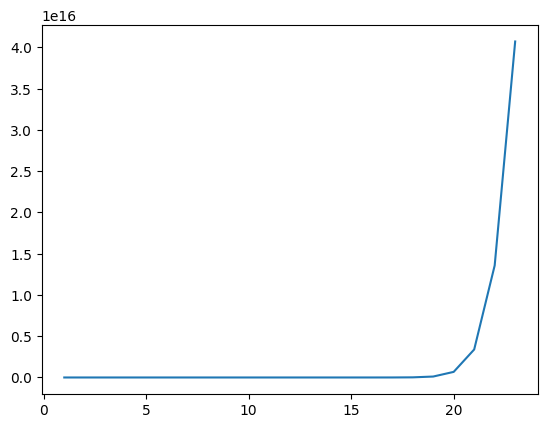

In [6]:
table_results = frequency_table(25,3)

plt.plot(table_results.keys(), table_results.values())
plt.show()

In [7]:
table_results

{1: 1.312749422390254e-07,
 2: 3.15059861373661e-06,
 3: 7.246376811594203e-05,
 4: 0.0015942028985507246,
 5: 0.033478260869565214,
 6: 0.6695652173913044,
 7: 12.721739130434782,
 8: 228.9913043478261,
 9: 3892.8521739130433,
 10: 62285.63478260869,
 11: 934284.5217391305,
 12: 13079983.304347826,
 13: 170039782.95652175,
 14: 2040477395.4782608,
 15: 22445251350.260868,
 16: 224452513502.6087,
 17: 2020072621523.4783,
 18: 16160580972187.826,
 19: 113124066805314.78,
 20: 678744400831888.8,
 21: 3393722004159443.5,
 22: 1.3574888016637774e+16,
 23: 4.072466404991332e+16}

<HR>

THINGS TO DO:
- Multiplier function
- Expectation